In [45]:
import numpy as np
import pandas as pd

population = pd.read_csv("Data/population_book0.csv")
population

,Country,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,Algeria,44.9,22.0,5.0,19.0,74.0,598.0
1,Egypt,103.5,21.0,7.0,16.0,44.0,3077.0
2,Libya,NaN,17.0,6.0,9.0,81.0,NaN
3,Morocco,36.7,92.0,50.0,15.0,64.0,479.0
4,Sudan,46.9,34.0,7.0,39.0,36.0,223.0
5,Tunisia,11.8,16.0,8.0,14.0,156.0,456.0
6,Western Sahara,0.6,17.0,6.0,26.0,87.0,14400.0
7,Ghana,33.5,28.0,8.0,32.0,58.0,1332.0
8,Liberia,5.3,31.0,9.0,58.0,53.0,1061.0
9,Mali,22.6,42.0,NaN,55.0,NaN,352.0


In [46]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      17 non-null     object 
 1   Population(millions)         16 non-null     float64
 2   Births per 1000 population   16 non-null     float64
 3   Deaths per 1000 populationi  15 non-null     float64
 4   Infant mortality rate        16 non-null     float64
 5   Urban Population (%)         15 non-null     float64
 6   Density of population        16 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.1+ KB


In [47]:
population.describe()

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
count,16.000000,16.000000,15.000000,16.00000,15.000000,16.00000
mean,36.900000,30.000000,10.200000,33.00000,62.666667,1514.18750
std,54.852712,18.779421,11.168834,19.16942,32.736320,3519.47254
min,0.600000,12.000000,5.000000,9.00000,4.000000,43.00000
25%,7.925000,17.000000,6.000000,15.75000,49.000000,183.00000
50%,20.250000,29.500000,8.000000,31.50000,58.000000,466.50000
75%,38.750000,33.250000,8.500000,46.50000,74.000000,1092.25000
max,218.500000,92.000000,50.000000,72.00000,156.000000,14400.00000


##### 2. Kiểm tra dữ liệu khuyết thiếu

In [48]:
population.isna()

,Country,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,True,False,True,False


In [51]:
_dict = {}
for i in range(0,len(population.columns),1):
    _dict[population.columns[i]] = population[population.columns[i]].isna().sum()

_dict

{'Country': 0,
 'Population(millions)': 1,
 'Births per 1000 population': 1,
 'Deaths per 1000 populationi': 2,
 'Infant mortality rate': 1,
 'Urban Population (%)': 2,
 'Density of population': 1}

- Population(millions): Số lượng dân số => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.
- Births per 1000 population: Số lượng trẻ sơ sinh trên 1000 dân số => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.
- Deaths per 1000 populationi: Số lượng qua đời trên 1000 dân số => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.
- Infant mortality rate: Tỉ lệ trẻ sơ sinh qua đời => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.
- Urban Population (%): Phần trăm danh số ở thành thị => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.
- Density of population: Mật độ dân số => Bộ dữ liệu không đủ để tính được thông số này => Xóa các dòng thiếu.

In [52]:
sub_population = population.dropna()

### 3. Trực quan hóa boxplot hoặc scatter plot các cột dữ liệu. Phân tích biểu đồ vừa dựng để phân tích xem có dữ liệu ngoại lai hay không trong từng thuộc tính của bộ dữ liệu

##### BoxPlot

In [53]:
sub_population[sub_population.columns[1:]]

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,44.9,22.0,5.0,19.0,74.0,598.0
1,103.5,21.0,7.0,16.0,44.0,3077.0
3,36.7,92.0,50.0,15.0,64.0,479.0
4,46.9,34.0,7.0,39.0,36.0,223.0
5,11.8,16.0,8.0,14.0,156.0,456.0
6,0.6,17.0,6.0,26.0,87.0,14400.0
7,33.5,28.0,8.0,32.0,58.0,1332.0
8,5.3,31.0,9.0,58.0,53.0,1061.0
10,218.5,12.0,12.0,72.0,53.0,53.0
11,17.9,32.0,5.0,33.0,49.0,49.0


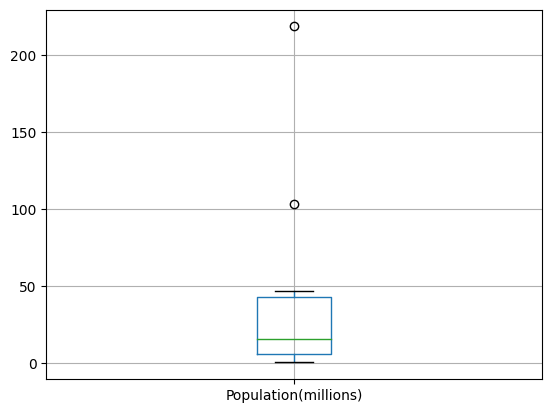

In [54]:
boxplot = sub_population.boxplot(column=['Population(millions)'])

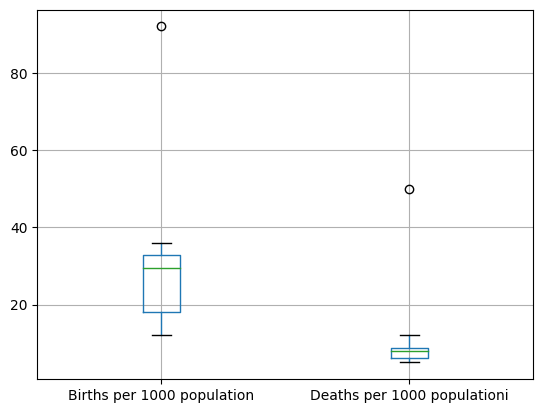

In [55]:
boxplot = sub_population.boxplot(column=['Births per 1000 population','Deaths per 1000 populationi'])

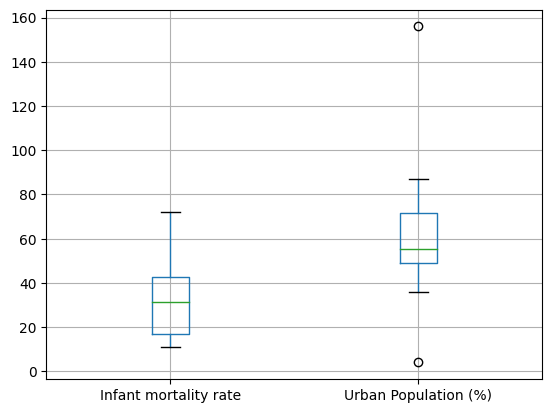

In [56]:
boxplot = sub_population.boxplot(column=['Infant mortality rate','Urban Population (%)'])

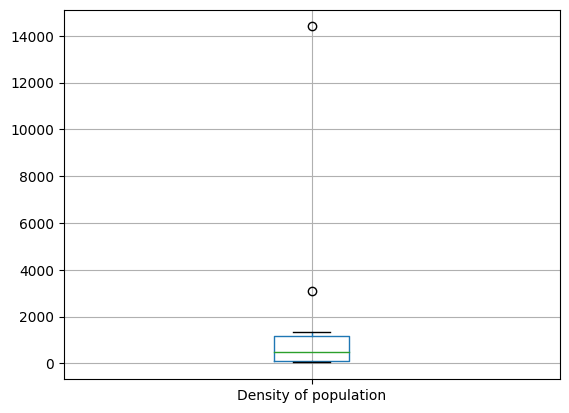

In [57]:
boxplot = sub_population.boxplot(column=['Density of population'])

- Đa số tất các các thuộc tính đều có dữ liệu ngoại lai ngoại trừ thuộc tính [Infant mortality rate] (Tỉ lệ trẻ sơ sinh qua đời)

### 4.Dùng Z-Score và IQR-Score để kiểm tra các dữ liệu ngoại lai. Nếu có, hãy loại bỏ các giá trị ngoại lai

#### Z-Score

In [59]:
from scipy import stats

z = stats.zscore(sub_population[sub_population.columns[1:]])
z

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,0.105590,-0.428089,-0.495128,-0.793117,0.390923,-0.298996
1,1.143029,-0.481126,-0.315082,-0.961355,-0.536691,0.387084
3,-0.039581,3.284539,3.555921,-1.017434,0.081718,-0.331930
4,0.140998,0.208362,-0.315082,0.328463,-0.784054,-0.402780
5,-0.480404,-0.746314,-0.225058,-1.073513,2.926400,-0.338295
6,-0.678686,-0.693276,-0.405105,-0.400564,0.792889,3.520799
7,-0.096232,-0.109863,-0.225058,-0.064090,-0.103804,-0.095857
8,-0.595478,0.049249,-0.135035,1.393964,-0.258407,-0.170858
10,3.178959,-0.958464,0.135035,2.179070,-0.258407,-0.449828
11,-0.372411,0.102287,-0.495128,-0.008011,-0.382088,-0.450935


In [60]:
noisy = np.where((z>2.4) | (z<-2.4))
print(noisy)

(array([2, 2, 4, 5, 8], dtype=int64), array([1, 2, 4, 5, 0], dtype=int64))


#### IQR-Score

In [61]:
from sklearn.preprocessing import MinMaxScaler

s_scaler = MinMaxScaler()
df_s = s_scaler.fit_transform(sub_population[sub_population.columns[1:]])

df_s = pd.DataFrame(df_s,columns=['Population(millions)','Births per 1000 population'
,'Deaths per 1000 populationi','Infant mortality rate','Urban Population (%)',
'Density of population'])
df_s

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,0.203304,0.1250,0.000000,0.131148,0.460526,0.038657
1,0.472235,0.1125,0.044444,0.081967,0.263158,0.211325
2,0.165672,1.0000,1.000000,0.065574,0.394737,0.030368
3,0.212483,0.2750,0.044444,0.459016,0.210526,0.012537
4,0.051400,0.0500,0.066667,0.049180,1.000000,0.028766
5,0.000000,0.0625,0.022222,0.245902,0.546053,1.000000
6,0.150987,0.2000,0.066667,0.344262,0.355263,0.089782
7,0.021570,0.2375,0.088889,0.770492,0.322368,0.070906
8,1.000000,0.0000,0.155556,1.000000,0.322368,0.000697
9,0.079394,0.2500,0.000000,0.360656,0.296053,0.000418


In [62]:
Q1 =df_s.quantile(0.25)
Q3 =df_s.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Population(millions)           0.168311
Births per 1000 population     0.184375
Deaths per 1000 populationi    0.055556
Infant mortality rate          0.426230
Urban Population (%)           0.148026
Density of population          0.073257
dtype: float64


In [63]:
iqr_noisy = (df_s<(Q1 - 1.5*IQR)) | (df_s>(Q3 + 1.5*IQR))
iqr_noisy

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,False,False,False,False,False,False
1,True,False,False,False,False,True
2,False,True,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,True,False,False,False,False,False
9,False,False,False,False,False,False


- Cả 2 cách khá tương đồng nhau đều không tìm thấy dữ liệu ngoại lai ở cột [4]

In [64]:
df_s = df_s[~((df_s<(Q1 - 1.5*IQR)) | (df_s>(Q3 + 1.5*IQR))).any(axis=1)]
df_s

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
0,0.203304,0.1250,0.000000,0.131148,0.460526,0.038657
3,0.212483,0.2750,0.044444,0.459016,0.210526,0.012537
6,0.150987,0.2000,0.066667,0.344262,0.355263,0.089782
7,0.021570,0.2375,0.088889,0.770492,0.322368,0.070906
9,0.079394,0.2500,0.000000,0.360656,0.296053,0.000418
11,0.009637,0.2625,0.066667,0.327869,0.355263,0.001393
12,0.058743,0.3000,0.088889,0.704918,0.296053,0.030229
13,0.000000,0.0375,0.000000,0.000000,0.460526,0.079613


In [70]:
a = len(df_s[df_s.columns[1]])
b = len(population[population.columns[1]])

print(round(100*(b-a)/b,3), '% các dòng dữ liệu thiếu và các giá trị ngoại lai đã bị loại bỏ',sep="")


52.941% các dòng dữ liệu thiếu và các giá trị ngoại lai đã bị loại bỏ
